In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("C:\\Users\\ak269\\projects\\Breast Cancer Classification\\breast-cancer.csv")

In [3]:
data.dropna(inplace = True)

In [4]:
data.groupby('diagnosis').mean()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [5]:
# In order to apply train test model we have categorized features in X and output in Y
X = data.drop(columns = 'diagnosis', axis = 1) # for rows axis = 0 and columns axis = 1
Y = data['diagnosis']
Y_new = np.array([1 if x == 'M' else 0 for x in Y])

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y_new, test_size = 0.2, shuffle = True)

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
X_train_fit = scaler.fit_transform(X_train)
X_test_fit = scaler.fit_transform(X_test)

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [10]:
# Making neural network framework
model = Sequential([
    keras.layers.Flatten(input_shape = (31,)),
    Dense(units = 32, activation = 'selu'),
    Dense(units = 80, activation = 'relu'),
    Dense(units = 2, activation = 'softmax')
])
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [11]:
Y_train

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,

In [12]:
history = model.fit(X_train_fit, Y_train, validation_split = 0.1, epochs = 10)

Epoch 1/10
13/13 [==============================] - 2s 38ms/step - loss: 0.4317 - accuracy: 0.8411 - val_loss: 0.2069 - val_accuracy: 0.9783
Epoch 2/10
13/13 [==============================] - 0s 8ms/step - loss: 0.1864 - accuracy: 0.9487 - val_loss: 0.0995 - val_accuracy: 1.0000
Epoch 3/10
13/13 [==============================] - 0s 7ms/step - loss: 0.1246 - accuracy: 0.9633 - val_loss: 0.0651 - val_accuracy: 1.0000
Epoch 4/10
13/13 [==============================] - 0s 7ms/step - loss: 0.1028 - accuracy: 0.9682 - val_loss: 0.0495 - val_accuracy: 1.0000
Epoch 5/10
13/13 [==============================] - 0s 8ms/step - loss: 0.0891 - accuracy: 0.9682 - val_loss: 0.0412 - val_accuracy: 1.0000
Epoch 6/10
13/13 [==============================] - 0s 7ms/step - loss: 0.0807 - accuracy: 0.9707 - val_loss: 0.0360 - val_accuracy: 1.0000
Epoch 7/10
13/13 [==============================] - 0s 13ms/step - loss: 0.0746 - accuracy: 0.9731 - val_loss: 0.0312 - val_accuracy: 1.0000
Epoch 8/10
13/13 [

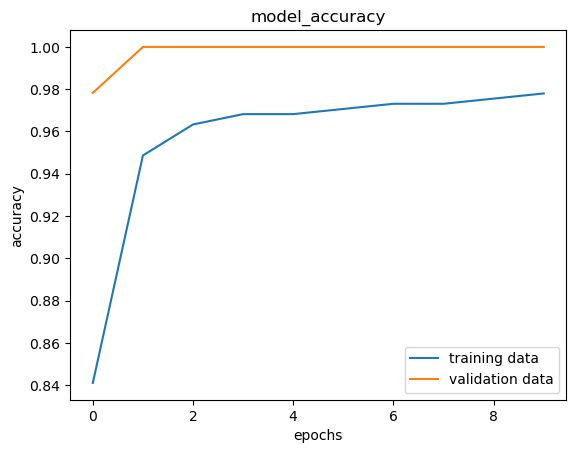

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')

plt.legend(['training data', 'validation data'], loc = 'lower right')

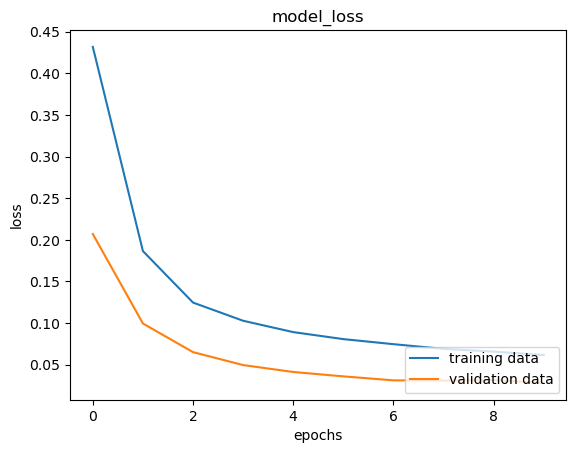

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epochs')

plt.legend(['training data', 'validation data'], loc = 'lower right')

In [15]:
loss, accuracy = model.evaluate(X_test_fit, Y_test)
print(loss)
print(accuracy)

4/4 [==============================] - 0s 5ms/step - loss: 0.0642 - accuracy: 0.9912
0.06417602300643921
0.9912280440330505


In [16]:
Y_pred = model.predict(X_test_fit)

4/4 [==============================] - 0s 1ms/step


In [17]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]

In [18]:
for i in Y_pred_labels:
    if i == 1:
        print('The tumour is malignant.')
        i = 'M'
    else:
        print('The tumour is benign.')
        i = 'B'


The tumour is benign.
The tumour is malignant.
The tumour is benign.
The tumour is malignant.
The tumour is benign.
The tumour is benign.
The tumour is benign.
The tumour is malignant.
The tumour is benign.
The tumour is benign.
The tumour is malignant.
The tumour is malignant.
The tumour is malignant.
The tumour is benign.
The tumour is benign.
The tumour is malignant.
The tumour is benign.
The tumour is benign.
The tumour is benign.
The tumour is malignant.
The tumour is benign.
The tumour is benign.
The tumour is malignant.
The tumour is benign.
The tumour is benign.
The tumour is benign.
The tumour is benign.
The tumour is benign.
The tumour is benign.
The tumour is benign.
The tumour is malignant.
The tumour is benign.
The tumour is malignant.
The tumour is benign.
The tumour is malignant.
The tumour is benign.
The tumour is malignant.
The tumour is benign.
The tumour is malignant.
The tumour is malignant.
The tumour is benign.
The tumour is benign.
The tumour is malignant.
The tu

In [19]:
Y_hat = ['Malignant' if i == 1 else 'Benign' for i in Y_pred_labels]
Y_hat

['Benign',
 'Malignant',
 'Benign',
 'Malignant',
 'Benign',
 'Benign',
 'Benign',
 'Malignant',
 'Benign',
 'Benign',
 'Malignant',
 'Malignant',
 'Malignant',
 'Benign',
 'Benign',
 'Malignant',
 'Benign',
 'Benign',
 'Benign',
 'Malignant',
 'Benign',
 'Benign',
 'Malignant',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Malignant',
 'Benign',
 'Malignant',
 'Benign',
 'Malignant',
 'Benign',
 'Malignant',
 'Benign',
 'Malignant',
 'Malignant',
 'Benign',
 'Benign',
 'Malignant',
 'Malignant',
 'Benign',
 'Malignant',
 'Benign',
 'Benign',
 'Benign',
 'Malignant',
 'Benign',
 'Benign',
 'Malignant',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Malignant',
 'Benign',
 'Benign',
 'Malignant',
 'Benign',
 'Benign',
 'Malignant',
 'Benign',
 'Malignant',
 'Benign',
 'Malignant',
 'Benign',
 'Malignant',
 'Benign',
 'Benign',
 'Malignant',
 'Benign',
 'Benign',
 'Malignant',
 'Malignant',
 'Malignant',
 'Benign',
 'Benign',
 'Malignant',
 'Ben

In [20]:
#breast_cancer_datasets = sklearn.datasets.load_breast_cancer()
#data = pd.DataFrame(breast_cancer_datasets.data, columns = breast_cancer_datasets.feature_names)
#data['target'] = breast_cancer_datasets.target
#data.dropna(inplace = True)
#data.groupby('target').mean()

Making Confusion Matrix

In [21]:
%matplotlib inline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import itertools
import matplotlib.pyplot as plt

In [22]:
cm = confusion_matrix(Y_test, Y_pred_labels) #size of Y_test and Y_pred_labels should be the same

In [23]:
cm_plot_label = ['Benign', 'Malignant']

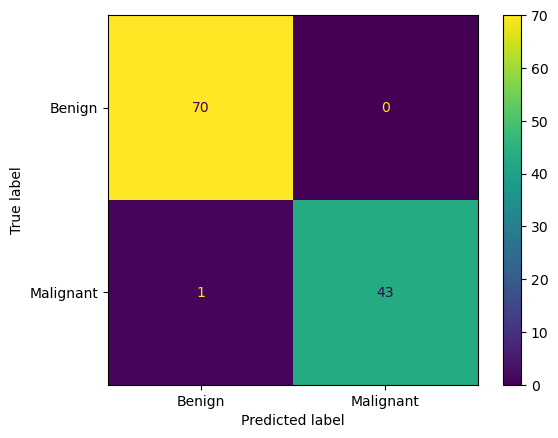

In [24]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = cm_plot_label)
disp.plot()
plt.show()

In [27]:
model.get_weights()

[array([[ 0.2231833 , -0.01001483, -0.17616157, -0.02905676, -0.26720876,
          0.07702214, -0.07660525,  0.05131556, -0.2078031 , -0.01404164,
         -0.12467136, -0.2205297 , -0.01230948,  0.13362889, -0.07906606,
          0.17154817,  0.08920474, -0.31311518,  0.24018773,  0.20710799,
         -0.05676265, -0.23437075, -0.20097247, -0.10515083, -0.31329656,
         -0.02672678, -0.19569762, -0.12756573,  0.16075794, -0.09024967,
          0.09367033,  0.04095546],
        [-0.28576288,  0.22432853,  0.22879584, -0.16098861,  0.06945711,
          0.30850264, -0.0083914 , -0.04984615, -0.11851524,  0.23358378,
          0.1988493 ,  0.07809987, -0.01702663, -0.02852417,  0.3238797 ,
         -0.24594624, -0.07794189,  0.2459822 ,  0.0253816 , -0.19648364,
         -0.02914175,  0.02225707,  0.25182232, -0.09022881, -0.03808413,
         -0.18993174,  0.03443239, -0.18364252, -0.20985954,  0.27229688,
          0.00488796,  0.2136756 ],
        [-0.0863263 ,  0.2757472 , -0.16